In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [17]:
# pip install mglearn

In [31]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [21]:
gen = pd.read_csv('drive/MyDrive/Dataset/gender_voice_dataset.csv')

gen_data = pd.DataFrame(gen)
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
"""
1 target variable: label (male or female)

20 independent variables:
meanfreq: mean frequency of the voice audio of the person (in kHz)
sd: standard deviation of the frequency of the voice audio
median: median frequency of the voice audio (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
meanfun: mean fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: mean of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index
"""

In [ ]:
"""
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
If the skewness is less than -1 or greater than 1, the data are highly skewed.
"""

In [5]:
# Specprop: This function returns a list of statistical properties of a frequency spectrum, which ahve been defined above.
# For more info you can visit: https://rdrr.io/cran/seewave/man/specprop.html

In [8]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
# You can see for columns like Q25 and maxdom we have very large range as compared to other columns, for this we have have to standardize or 
# normalize the data. You can leave them as it si also but this may bring down the predictive power of the model.

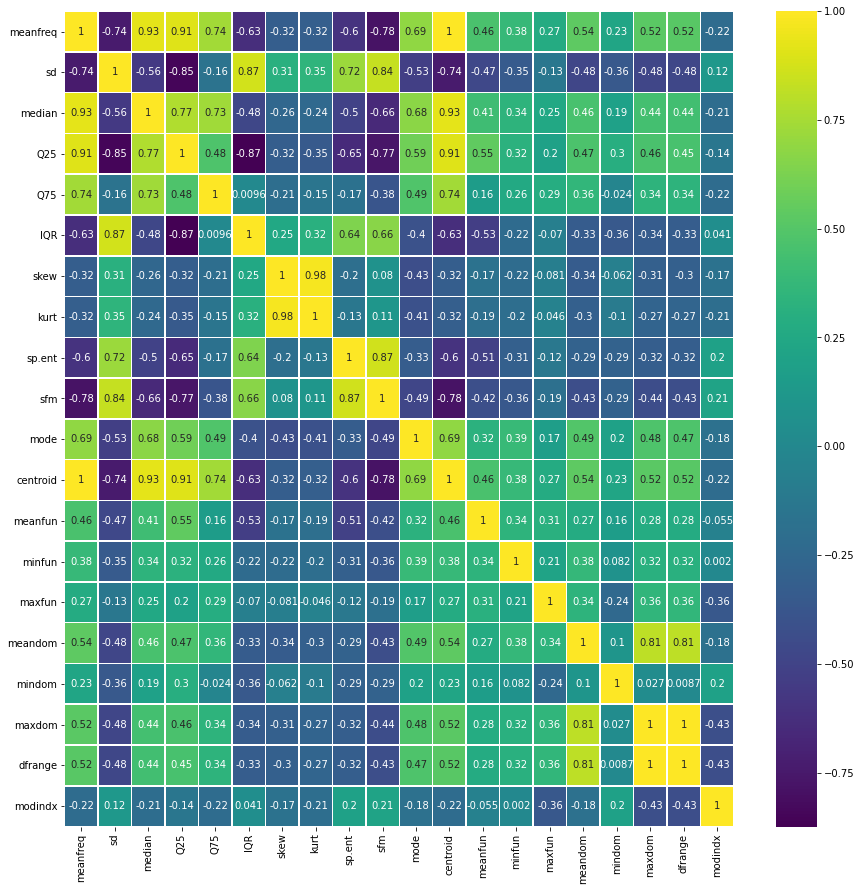

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [11]:
# We already understood about correlation, from here we can see that alot of columns are directly or inversely correlated with some 
# other columns having correlation value as high as 0.98
# Hence we will be removinfg some columns that don't help the model in learning or generalizing over the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


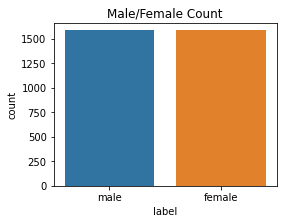

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(gen_data['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

In [14]:
# There is no case of imbalance class, meaning one class doesn't dominate in the dataset.

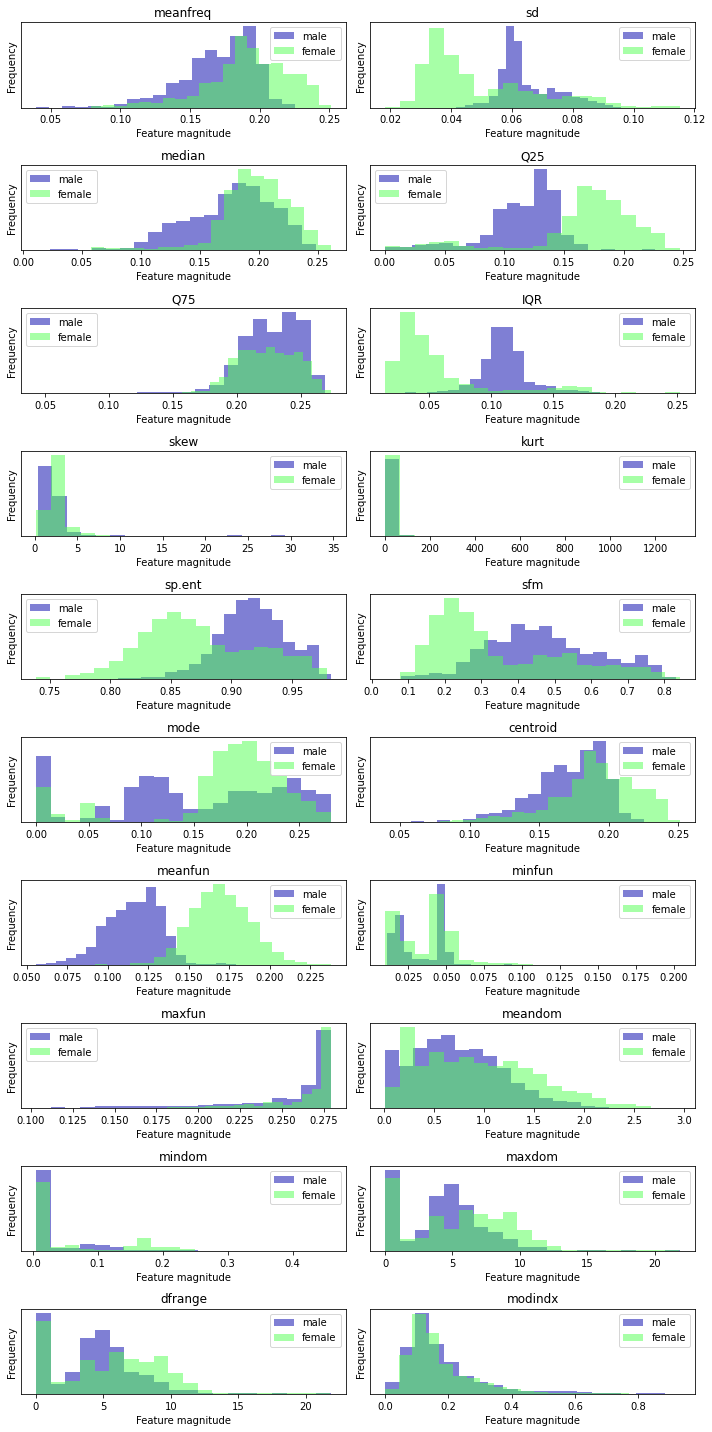

In [25]:
#Plot the histograms
male = gen.loc[gen['label']=='male']
female = gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [ ]:
# from the graph we can see which are the columns that able to define male and female separetely.

In [27]:
gen_new = gen_data.drop(['dfrange', 'kurt', 'sfm', 'meandom', 'meanfreq'], axis = 1)

In [28]:
gen_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

In [29]:
y = gen_new['label']
X = gen_new.drop(['label'], axis = 1)

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [33]:
#Train support vector machine model
svm = SVC().fit(Xtrain, ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Support Vector Machine
Accuracy on training set: 0.72
Accuracy on test set: 0.73


In [36]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [35]:
# Welp lets go with RandonForestClassifier 

In [37]:
# save the model to disk
import pickle
filename = 'drive/MyDrive/Dataset/Models/voice_model.pickle'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
"""
# load the model from disk
filename = 'drive/MyDrive/Dataset/Models/pokemon_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)
"""